In [ ]:
library(pheatmap)
library(data.table) 
library(repr)
library(reshape2)
library(ComplexUpset)
library(ggplot2)
sessionInfo()
# Change plot size to 8 x 8
options(repr.plot.width=8, repr.plot.height=8)

## Visualisation of donor matching

In [57]:
# Load correlation matrix
correlation_gx12 <- fread("../data/pipeline_output/gx12/correlation_res.csv")
correlation_gx12 <- as.data.frame(correlation_gx12)
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[,-1]
colnames(correlation_gx12) <- gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <- gsub("-TotalSeqA", "", rownames(correlation_gx12))

correlation_gx12

,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hash451,-0.2275197,0.74937992,-0.18132714,-0.18549398,-0.09556602,-0.19805405
Hash452,-0.2014033,-0.18286343,-0.11152722,-0.16170086,-0.09407122,0.75006417
Hash453,-0.1924779,-0.06637141,0.55651595,-0.09256307,-0.04810021,-0.14982165
Hash454,0.8930860,-0.25194820,-0.19171140,-0.18771778,-0.12500167,-0.19582197
Hash455,-0.1037505,-0.08837050,-0.01772064,-0.06368348,0.52835531,-0.06691017
Hash456,-0.1832036,-0.19431709,-0.13199943,0.78693512,-0.09013880,-0.14997682


In [58]:
# Scale the matrix between -1 and 1

correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <- ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1
scaled_matrix 

,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
Hash451,-0.9573314,0.7489925,-0.8766481,-0.8839262,-0.7268515,-0.9058646
Hash452,-0.9117145,-0.8793315,-0.7547305,-0.8423674,-0.7242406,0.7501877
Hash453,-0.8961249,-0.6758581,0.4121223,-0.7216063,-0.6439443,-0.8216183
Hash454,1.0000000,-1.0000000,-0.8947860,-0.8878105,-0.7782659,-0.9019658
Hash455,-0.7411471,-0.7142833,-0.5908811,-0.6711631,0.3629349,-0.6767991
Hash456,-0.8799256,-0.8993373,-0.7904887,0.8145892,-0.7173719,-0.8218894


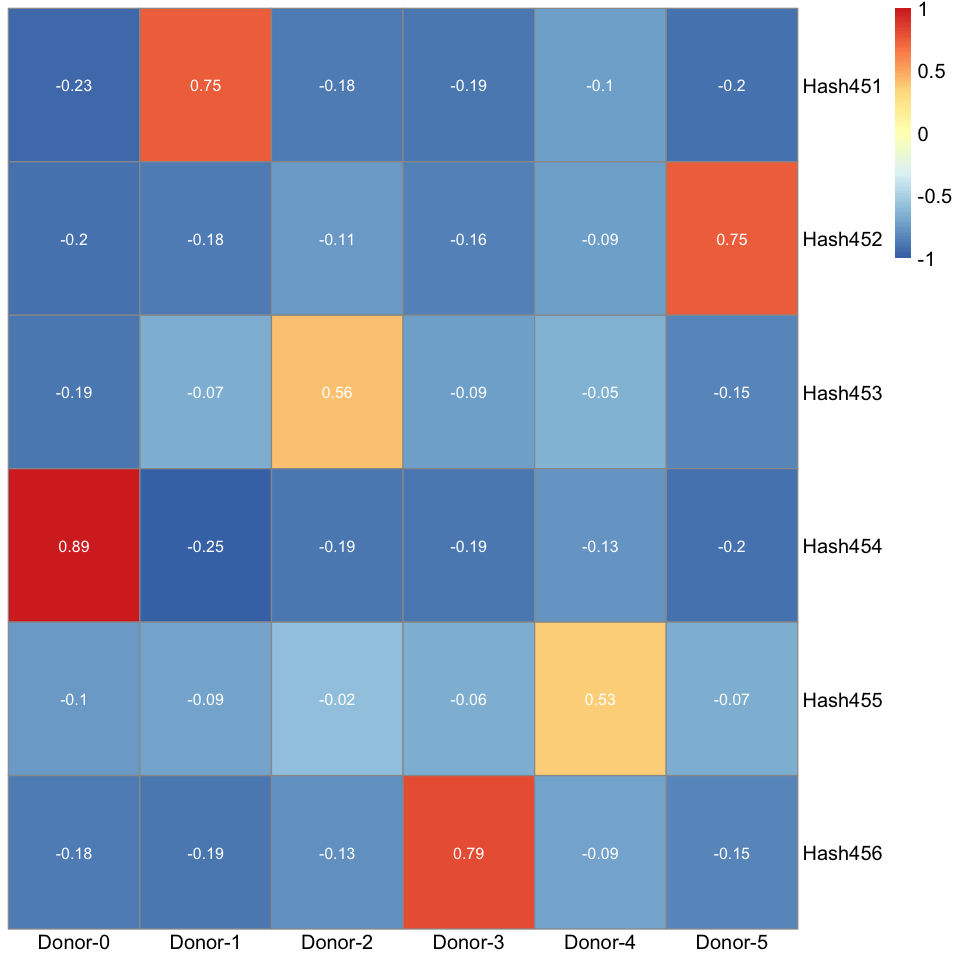

In [59]:
# Define the color palette and the annotation
newCols <- colorRampPalette(grDevices::rainbow(6))
annoCol <- newCols(6)
names(annoCol) <- colnames(correlation_gx12)
annoCol <- list(category = annoCol)

# Sort the axis
scaled_matrix <- scaled_matrix[order(row.names(scaled_matrix)), ]

# Heatamp
pheatmap(scaled_matrix, treeheight_row=F, treeheight_col=F, display_numbers=round(correlation_gx12,2), angle_col="0",
         number_color = "white", fontsize = 12, cluster_rows = F, cluster_cols = F) #, filename="concordance_heatmap_gx12.png", width = 7, height = 5

## Visualisation of donor-specific variants

In [ ]:
# Load informative_variants 
informative_variants <- fread("../data/pipeline_output/gx12/all_representative_variant_df.csv")
head(informative_variants)

In [ ]:
# filter donor-specifc variants
informative_variants$count <- rowSums(informative_variants[,-c(1,2)])
informative_variants <- informative_variants[informative_variants$count==1,]
informative_variants <- informative_variants[, 2:8]
head(informative_variants)

In [ ]:
# Count donor-specifc variants
donor_specific_variants <- data.frame("donor"= setdiff(colnames(informative_variants), 'variant'), variants = 0 * (ncol(informative_variants)-1))
donor_specific_variants$variants <- colSums(informative_variants[,-1])
donor_specific_variants

In [ ]:
# make bar plot
ggplot(donor_specific_variants, aes(x=donor, y = variants)) + geom_bar(stat="identity", fill = "#4e659b") + theme_bw() + ##a6d5ed
  theme(axis.title=element_text(size=13.5)) + xlab("Hashtag") + ylab("Count") + 
  geom_text(aes(label=variants), vjust=-0.3, size=5) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 13), legend.text=element_text(size=12),legend.title=element_text(size=12))
ggsave("Figure3.3-donor-specific-variants.png")